# **Visualization of Hostel Data in Japan**

# **Purpose**
I would like to deal with data on hostels in Japan. The most important characteristic of hostels is the low price of accommodation. Since hostels originated as youth accommodations, the price per night is kept low compared to other accommodations. In recent years, the value of hostels is being reappraised due to the increasing number of foreigners visiting Japan who are interested in experiencing Japanese culture and the changing needs of domestic travelers who want to spend less on travel expenses and more on human interaction.Hostels and hotels are often confused with each other because they have very similar names, but the main difference between the two is the value they offer. While hotels focus on hospitality, such as attentive service and high quality rooms, hostels provide a place where guests can build a community with each other. For example, while hotels provide individual privacy, hostels have a lot of shared space, and even bedrooms are often shared with other people. I would like to clarify which areas of Japan have good hostels and the differences between hostels in each area to help travelers coming to Japan.
  
# **Data set**
 https://www.kaggle.com/datasets/koki25ando/hostel-world-dataset  
I reffred to kaggle. This data was creaed by one japanese man and the source of this data is HostelWorld.com. HostelWorld.com is for young and independent travellers seeking a social travel experience. The gourp focuses on hostels, maintains a leding hostel database with over 16,000 hostels and approximately 20,000 other forms of budget accommodation available globally unlike the other travel agents. This data has around 300 records and has 17 columns such as City, Distance from city center, price, score etc.


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import altair as alt
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("drive/My Drive/Colab Notebooks/9.DTSA_5304_WEEK4/Hostel.csv")
df.rename(columns={'hostel.name': 'hostel_name'}, inplace=True)
df.rename(columns={'price.from': 'price_from'}, inplace=True)
df.rename(columns={'summary.score': 'summary_score'}, inplace=True)
df.rename(columns={'rating.band': 'rating_band'}, inplace=True)
df.rename(columns={'location.y': 'location_y'}, inplace=True)
df = df[df['price_from'] < 1000000] # Excluded two bugs with a price exceeding 1 million yen.
df = df[df['lat'] > 30]             # Excluded one bug with a latitude 1.3. This is not Japan.
df = df[df['lon'] != 138.252924]    # Excluded one bug. It's City is Osaka, but lon&lat is not Osaka.
df = df[df['lon'] != 137.2414859]   # Excluded one bug. It's City is Osaka, but lon&lat is not Osaka.
df['Distance_km'] = df['Distance'].str.extract(r'(\d+\.\d+)').astype(float)

df.head()

,Unnamed: 0,hostel_name,City,price_from,Distance,summary_score,rating_band,atmosphere,cleanliness,facilities,location_y,security,staff,valueformoney,lon,lat,Distance_km
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5
5,6,1night1980hostel Tokyo,Tokyo,2100,9.4km from city centre,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384,9.4


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 341
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     293 non-null    int64  
 1   hostel_name    293 non-null    object 
 2   City           293 non-null    object 
 3   price_from     293 non-null    int64  
 4   Distance       293 non-null    object 
 5   summary_score  293 non-null    float64
 6   rating_band    293 non-null    object 
 7   atmosphere     293 non-null    float64
 8   cleanliness    293 non-null    float64
 9   facilities     293 non-null    float64
 10  location_y     293 non-null    float64
 11  security       293 non-null    float64
 12  staff          293 non-null    float64
 13  valueformoney  293 non-null    float64
 14  lon            293 non-null    float64
 15  lat            293 non-null    float64
 16  Distance_km    265 non-null    float64
dtypes: float64(11), int64(2), object(4)
memory usage: 41.2+ KB


# **Task1:Which city has the best hostels available**

**Q.**Why are you pursuing this task?\
**A.**To help visitors to Japan and myself when we travel. Also, as a purely Japanese person, I would like to know which area is doing the best.

**Q.**How is the task done? \
**A.**By how many high scoring hostels are present. Some think of it as taking a ratio, but a simple number of cases is considered more substantial.

In [89]:
warnings.filterwarnings('ignore')
c1 = alt.Chart(df[df["City"]=="Tokyo"]).mark_bar().encode(alt.X('summary_score', bin={'step': 1, 'extent': [1, 10]}),y=alt.Y('count()', scale=alt.Scale(domain=[0, 70]))).properties(width=170,height=170,title="Tokyo")
c2 = alt.Chart(df[df["City"]=="Kyoto"]).mark_bar().encode(alt.X('summary_score', bin={'step': 1, 'extent': [1, 10]}),y=alt.Y('count()', scale=alt.Scale(domain=[0, 70]))).properties(width=170,height=170,title="Kyoto")
c3 = alt.Chart(df[df["City"]=="Osaka"]).mark_bar().encode(alt.X('summary_score', bin={'step': 1, 'extent': [1, 10]}),y=alt.Y('count()', scale=alt.Scale(domain=[0, 70]))).properties(width=170,height=170,title="Osaka")
c4 = alt.Chart(df[df["City"]=="Hiroshima"]).mark_bar().encode(alt.X('summary_score', bin={'step': 1, 'extent': [1, 10]}),y=alt.Y('count()', scale=alt.Scale(domain=[0, 70]))).properties(width=170,height=170,title="Hiroshima")
c5 = alt.Chart(df[df["City"]=="Fukuoka-City"]).mark_bar().encode(alt.X('summary_score', bin={'step': 1, 'extent': [1, 10]}),y=alt.Y('count()', scale=alt.Scale(domain=[0, 70]))).properties(width=170,height=170,title="Fukuoka-City")
alt.hconcat(c1,c2,c3,c4,c5)

alt.HConcatChart(...)

**Result**   
- Tokyo has the highest number of hostels with a high summary score of over 9, with over 60. Following Tokyo are Osaka and Kyoto with scores over 40, and Hiroshima and Nagasaki with scores around 10. If you want to stay in a good hostel, Tokyo is the most likely place to do so.

# **Task2:Understanding the characteristics of hostels in each city**

**Q.**Why are you pursuing this task?\
**A.**Because each region has its own characteristics and I think that there may also be differences in hostels in each region. This analysis may help for travelers.

**Q.**How is the task done? \
**A.**By comparing score values for each item such as cleanliness, security, etc. In addition, the following techniques are used for visualization:  
  - Mark Circle
  - Violin Plot

In [90]:
warnings.filterwarnings('ignore')

row1 = alt.hconcat(
    alt.Chart(df).mark_circle().encode(x = "atmosphere",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","atmosphere","summary_score"]).properties(width=200,height=200),
    alt.Chart(df).mark_circle().encode(x = "cleanliness",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","cleanliness","summary_score"]).properties(width=200,height=200),
    alt.Chart(df).mark_circle().encode(x = "facilities",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","facilities","summary_score"]).properties(width=200,height=200),
    alt.Chart(df).mark_circle().encode(x = "location_y",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","location_y","summary_score"]).properties(width=200,height=200)
)

row2 = alt.hconcat(
    alt.Chart(df).mark_circle().encode(x = "security",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","security","summary_score"]).properties(width=200,height=200),
    alt.Chart(df).mark_circle().encode(x = "staff",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","staff","summary_score"]).properties(width=200,height=200),
    alt.Chart(df).mark_circle().encode(x = "valueformoney",y = "summary_score",
                                       color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
                                       tooltip=["City","valueformoney","summary_score"]).properties(width=200,height=200)
)

alt.vconcat(row1, row2)

alt.VConcatChart(...)

**Result1**   
- A scatter plot of summary scores and the respective scores is shown in the graph above. Overall, Hiroshima and Fukuoka are clustered in the upper right corner of each graph, indicating that there are many hostels with high scores with little variation in scores. However, it is difficult to read further regional differences in these graphs, so we will move on to the next graph.

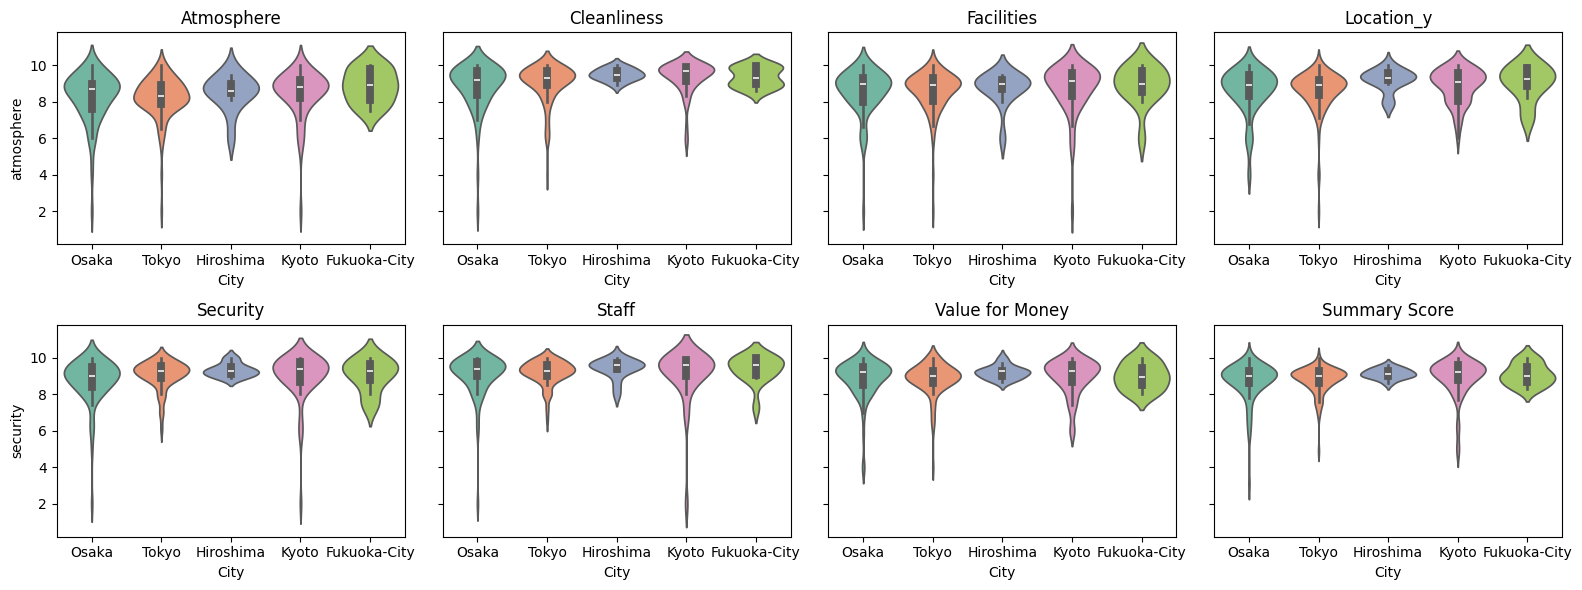

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharey=True)
custom_palette = sns.color_palette("Set2")

sns.violinplot(ax=axes[0, 0], x=df["City"], y=df["atmosphere"], data=df, palette=custom_palette)
axes[0, 0].set_title("Atmosphere")

sns.violinplot(ax=axes[0, 1], x=df["City"], y=df["cleanliness"], data=df, palette=custom_palette)
axes[0, 1].set_title("Cleanliness")

sns.violinplot(ax=axes[0, 2], x=df["City"], y=df["facilities"], data=df, palette=custom_palette)
axes[0, 2].set_title("Facilities")

sns.violinplot(ax=axes[0, 3], x=df["City"], y=df["location_y"], data=df, palette=custom_palette)
axes[0, 3].set_title("Location_y")

sns.violinplot(ax=axes[1, 0], x=df["City"], y=df["security"], data=df, palette=custom_palette)
axes[1, 0].set_title("Security")

sns.violinplot(ax=axes[1, 1], x=df["City"], y=df["staff"], data=df, palette=custom_palette)
axes[1, 1].set_title("Staff")

sns.violinplot(ax=axes[1, 2], x=df["City"], y=df["valueformoney"], data=df, palette=custom_palette)
axes[1, 2].set_title("Value for Money")

sns.violinplot(ax=axes[1, 3], x=df["City"], y=df["summary_score"], data=df, palette=custom_palette)
axes[1, 3].set_title("Summary Score")

plt.tight_layout()
plt.show()

**Result2**
  - As seen above, Hiroshima and Fukuoka have the high scoring hostels with less variation in all factors.The only difference is that Facilities scores vary, but this seems to be due to the fact that they are not equipped with the latest facilities as in large cities.
  - The scores for Tokyo, Osaka, and Kyoto seem to vary due to the large number of hostels in these large cities, while Tokyo's scores for security and staff are less varied, suggesting that hostels are a safe place to stay. In Kyoto, there is little variation in Cleanliness scores, but the buildings seem to be well cared for, as the area is home to many old historical buildings.

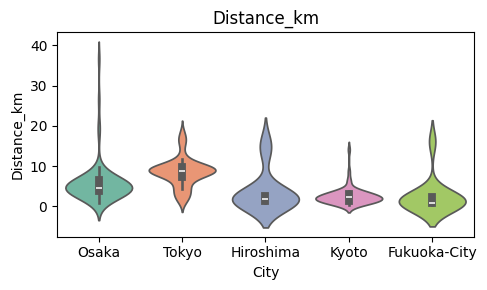

In [92]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3), sharey=True)
sns.violinplot(x=df["City"], y=df["Distance_km"], data=df, palette=custom_palette).set_title("Distance_km")
plt.tight_layout()

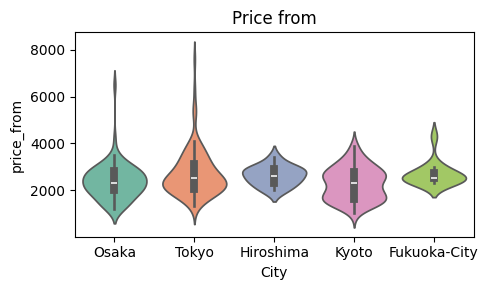

In [93]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3), sharey=True)
sns.violinplot(x=df["City"], y=df["price_from"], data=df, palette=custom_palette).set_title("Price from")
plt.tight_layout()

**Result3**
  - Tokyo has the largest values for distance from the city and price, which is a reasonable result since Tokyo is the largest city. Only Osaka has a particularly large value for distance, but Tokyo does not, which is surprising.

# **Task3:Mapping of hostel data to map information**

**Q.**Why are you pursuing this task?\
**A.**In addition to mapping actual maps and hostel locations so that we can see good/not so good hostel areas, I also believe that this will help travelers when looking for hostels with good scores.

**Q.**How is the task done? \
**A.**I used Mapbox to handle map information. This allows each data to be plotted on a map based on latitude and longitude.I also looked at the figure for each city for a more detailed look at the mapping data.

**Example**  
The first figure below is a scatter plot of latitude and longitude of the whole hostel data. The second figure is a plot of the data on a map using mapbox.

In [94]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('lon', scale=alt.Scale(domain=[129, 140])),
    y=alt.Y('lat', scale=alt.Scale(domain=[33, 37])),
    color=alt.Color('City', scale=alt.Scale(scheme='spectral')),
    size="summary_score",
    tooltip=["summary_score"]
).properties(width=600,height=300)

alt.Chart(...)

In [95]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=5,
    opacity=1.0,
    zoom=4.5,
    height=500,
    width=1200,
    center={"lat": 35.689501, "lon": 139.691722}  #Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

**Result : TOKYO**  
- Below is a map mapping hostel data for Tokyo. It seems no difference in good and not-so-good hostels depending on location.

In [96]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=7,
    opacity=1.0,
    zoom=9.5,
    height=500,
    width=1200,
    center={"lat": 35.689501, "lon": 139.691722}  # Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

**Result : OSAKA**  
- Below is a map mapping hostel data for OSAKA. Hostels in the southern region scored lower overall, while those in the northern region scored higher. Therefore, if there is no particular reason, the north side is recommended.

In [97]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=7,
    opacity=1.0,
    zoom=10.5,
    height=500,
    width=1200,
    center={"lat": 34.6862, "lon": 135.5196}  # Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

**Result : KYOTO**  
- Overall, the town center scores better.

In [98]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=7,
    opacity=1.0,
    zoom=10.5,
    height=500,
    width=1200,
    center={"lat": 35.0116, "lon": 135.768}  # Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

**Result : HIROSHIMA**  
- Overall scores are good, but be aware that some of the hostels are out of the center of the city.

In [99]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=7,
    opacity=1.0,
    zoom=10.5,
    height=500,
    width=1200,
    center={"lat": 34.3965, "lon": 132.4596}  # Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

**Result : FUKUOKA**  
- The overall score is good, and there are no hostels out of the center, so it seems safe to choose any of them.

In [100]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat="lat",
    lon="lon",
    hover_data={"City": True, "summary_score": True, "Distance_km":True},
    color="summary_score",
    size="summary_score",
    size_max=7,
    opacity=0.8,
    zoom=11,
    height=500,
    width=1200,
    center={"lat": 33.6065, "lon": 130.4182}  # Initial setting
)
#fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

# **Summary and Discussion**
I performed the following three tasks using Japanese hostel data:  
- *Task1:Which city has the best hostels available*  
  The number of high-scoring hostels was counted for each city and I arranged in a bar graph so that the correct answers to this task could be seen at a glance.

- *Task2:Understanding the characteristics of hostels in each city*  
  By comparing score values for each item such as cleanliness, security, etc. In addition, the following techniques are used for visualization:  
  - Mark Circle  
  In the Mark circle, I found that Hiroshima and Fukuoka are clustered in the upper right corner of each graph, indicating that there are many hostels with high scores with little variation in scores. However, it is difficult to read further regional differences in these graphs.

  - Violin Plot  
  By using violin plots, I found the following additional factors in addition to those found in the mark circle:   
     - The scores for Tokyo, Osaka, and Kyoto seem to vary due to the large number of hostels in these large cities, while Tokyo's scores for security and staff are less varied, suggesting that hostels are a safe place to stay.
     - In Kyoto, there is little variation in Cleanliness scores, but the buildings seem to be well cared for, as the area is home to many old historical buildings.

- *Task3:Mapping of hostel data to map information*  
  I used Mapbox to handle map information. I also looked at the figure for each city for a more detailed and found following points:  
  - TOKYO : It seems no difference in good and not-so-good hostels depending on location.  
  - OSAKA : Hostels in the southern region scored lower overall, while those in the northern region scored higher. Therefore, if there is no particular reason, the north side is recommended.  
  - KYOTO : Overall, the town center scores better.  
  - HIROSHIMA : Overall scores are good, but be aware that some of the hostels are out of the center of the city.
  - FUKUOKA : The overall score is good, and there are no hostels out of the center, so it seems safe to choose any of them.  

Of the three tasks above, only Task 2, Mark Circle, seems to have room for improvement in visualization as it is difficult to read the results from the graph, but the rest of the tasks was executed to create a visualization that intuitively deepens the understanding of hostels in Japan. By providing this information to travelers, it is hoped that they will be able to make a better decision when choosing a hostel.  

This time, I tried to publish the application externally using streamlit and ngrok, but it did not go well, so I decided to use the notebook. In the next issue, I would like to publish the application to the outside world.


